# Movie Rating Prediction With Python

## Lets's start with data analysis and wrangling

In [1]:
# data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd

In [2]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Movie Dataset

In [4]:
# loading Movie Dataset

df_movie = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
df_movie

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [5]:
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


## Load Rating Dataset

In [6]:
# loading rating dataset

df_rating = pd.read_csv('ratings.dat', sep='::', engine='python', encoding='latin-1')
df_rating

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [7]:
df_rating.columns =['ID', 'MovieID', 'Ratings', 'TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


## Load users dataset

In [8]:
df_user = pd.read_csv('users.dat', sep='::', engine='python', encoding='latin-1')
df_user

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [9]:
df_user.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


## Concatinate all 3 dataset

In [10]:
# concatenate the dataset

df_combined = pd.concat([df_user, df_rating, df_movie], axis=1)

# Display the combined dataset

df_combined .head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp,MovieIDs,MovieName,Category
0,2.0,M,56.0,16.0,70072,1,661,3,978302109,2.0,Jumanji (1995),Adventure|Children's|Fantasy
1,3.0,M,25.0,15.0,55117,1,914,3,978301968,3.0,Grumpier Old Men (1995),Comedy|Romance
2,4.0,M,45.0,7.0,02460,1,3408,4,978300275,4.0,Waiting to Exhale (1995),Comedy|Drama
3,5.0,M,25.0,20.0,55455,1,2355,5,978824291,5.0,Father of the Bride Part II (1995),Comedy
4,6.0,F,50.0,9.0,55117,1,1197,3,978302268,6.0,Heat (1995),Action|Crime|Thriller


## Visualise user age distribute

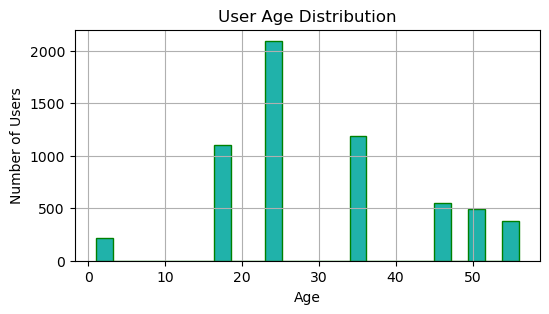

In [11]:
# create a histogram to visualize the user age distribution
plt.figure(figsize=(6, 3))
plt.hist(df_user['Age'], bins=25, color='lightseagreen', edgecolor='green')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

## User Age Distribution by Group

In [12]:
# 1. Define age bins and labels
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# 2. Add a new column with age groups
df_combined['Age Group'] = pd.cut(df_combined['Age'], bins=age_bins, labels=age_labels)
df_combined[['Age', 'Age Group']].drop_duplicates()[:10]

,Age,Age Group
0,56.0,56-65
1,25.0,19-25
2,45.0,36-45
4,50.0,46-55
5,35.0,26-35
16,18.0,0-18
17,1.0,0-18
6039,NaN,NaN


## Visualise overall rating by user

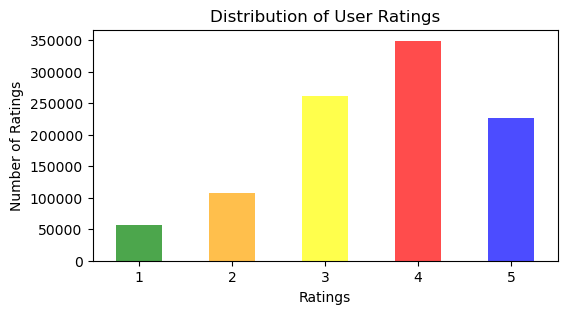

In [13]:
# count the number of occurancies for each rating
ratings_counts = df_rating['Ratings'].value_counts().sort_index()

# create a bar plot to visualize the distribution of user ratings

# define colors for each rating value
colors = ['green', 'orange', 'yellow','red', 'blue']

plt.figure(figsize=(6, 3))
ratings_counts.plot(kind='bar', alpha=0.7, color=colors)
plt.title('Distribution of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()

In [14]:
groupedby_movieName = df_combined.groupby('MovieName')
groupedby_rating = df_combined.groupby('Ratings')
groupedby_uid = df_combined.groupby('UserID')

In [16]:
movies = df_combined.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [18]:
Top_gun_data = groupedby_movieName.get_group('Top Gun (1986)')
Top_gun_data.shape

(1, 13)

## Find and visualize the user rating of the movie "Top  Gun"

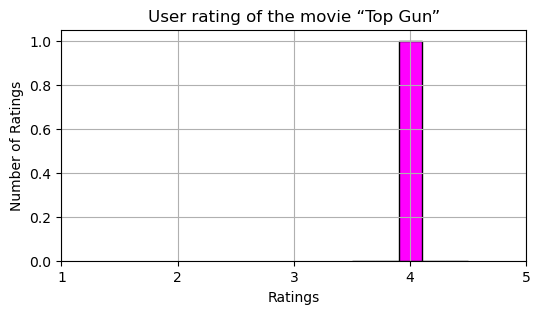

In [29]:
# 1. Filter data for "Top Gun"
top_gun_data = df_combined[df_combined['MovieName'] == 'Top Gun (1986)']

# 2. Visaualize user ratings for "Top Gun"
plt.figure(figsize=(6, 3))
plt.hist(top_gun_data['Ratings'],bins=5,color='magenta',edgecolor='black')
plt.title('User rating of the movie “Top Gun”')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

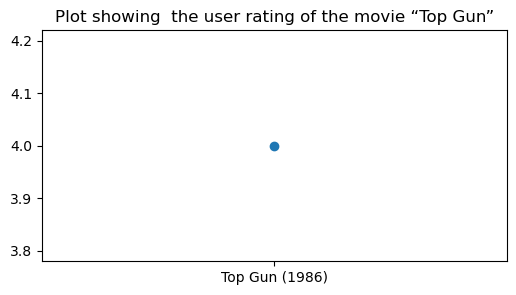

In [30]:
# find and visualize the user rating of the movie "Top Gun"
plt.figure(figsize=(6, 3))
plt.scatter(top_gun_data['MovieName'],top_gun_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Top Gun”')
plt.show()

In [31]:
print(df_combined.head())

   UserID Gender   Age  Occupation Zip-code  ID  MovieID  Ratings  TimeStamp  \
0     2.0      M  56.0        16.0    70072   1      661        3  978302109   
1     3.0      M  25.0        15.0    55117   1      914        3  978301968   
2     4.0      M  45.0         7.0    02460   1     3408        4  978300275   
3     5.0      M  25.0        20.0    55455   1     2355        5  978824291   
4     6.0      F  50.0         9.0    55117   1     1197        3  978302268   

   MovieIDs                           MovieName                      Category  \
0       2.0                      Jumanji (1995)  Adventure|Children's|Fantasy   
1       3.0             Grumpier Old Men (1995)                Comedy|Romance   
2       4.0            Waiting to Exhale (1995)                  Comedy|Drama   
3       5.0  Father of the Bride Part II (1995)                        Comedy   
4       6.0                         Heat (1995)         Action|Crime|Thriller   

  Age Group  
0     56-65  
1   

In [32]:
# Find and visualzie the viewership of the movie "Top Gun" by age group
Top_gun_data[['MovieName', 'Age Group']]

,MovieName,Age Group
1084,Top Gun (1986),0-18


## Find and visualize the top 25 movies by viewership rating

C:\Users\pearl\AppData\Local\Temp\ipykernel_18556\1228988452.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(top_25_movies))


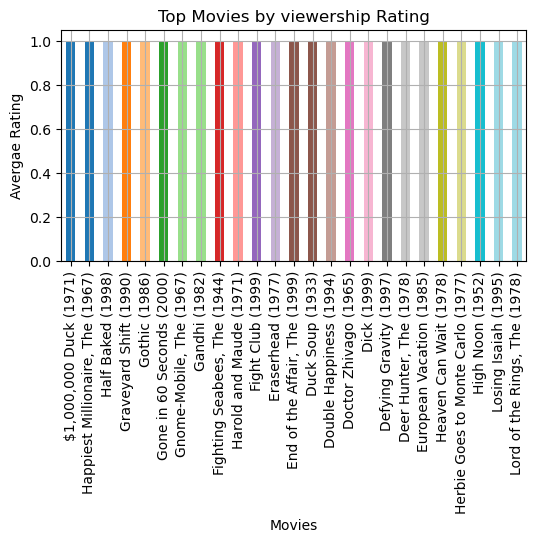

In [33]:
# 1. Calculate average ratings for each movie
movie_ratings = df_combined.groupby('MovieName')['Ratings'].mean()

# 2. Start movie based on average ratings
sorted_movies = movie_ratings.sort_values(ascending=True)

# 3. Select top 25 movies
top_25_movies = sorted_movies.head(25)

# 4. Visualize the top 25 movies by viewership rating
plt.figure(figsize=(6, 3))
color_palette = plt.cm.get_cmap('tab20', len(top_25_movies))
top_25_movies.plot(kind='bar', color=color_palette.colors)
plt.title('Top Movies by viewership Rating')
plt.xlabel('Movies')
plt.ylabel('Avergae Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [34]:
# Top 25
# Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


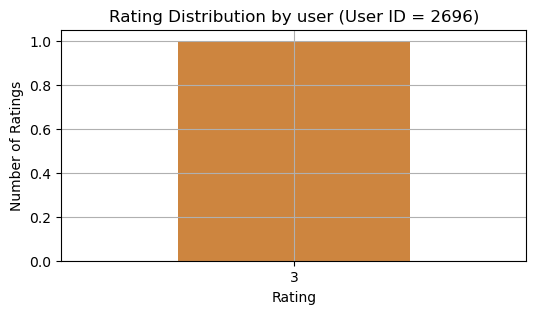

In [37]:
# 1. Filter data for the user with user ID 2696
user_2696_data = df_combined[df_combined['UserID'] == 2696]

# 2. Visualize the distribution of ratings given by user 2696
plt.figure(figsize=(6, 3))
user_2696_data['Ratings'].value_counts().sort_index().plot(kind='bar', color='peru')
plt.title('Rating Distribution by user (User ID = 2696)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

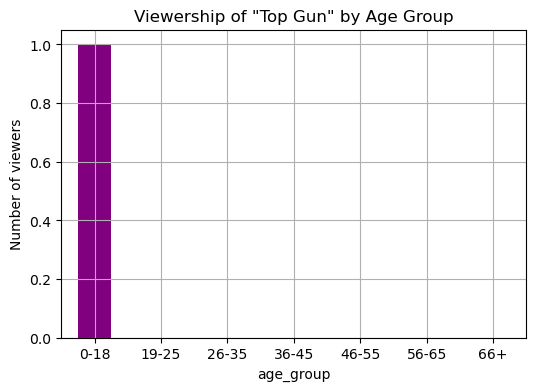

In [38]:
# Group data by age group and calculate viewership count
age_group_viewership = top_gun_data.groupby('Age Group').size()

# visualize viewership of 'Top Gun' by age group
plt.figure(figsize=(6, 4))
age_group_viewership.plot(kind='bar', color='purple')
plt.title('Viewership of "Top Gun" by Age Group')
plt.xlabel('age_group')
plt.ylabel('Number of viewers')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Visualize overall rating by users

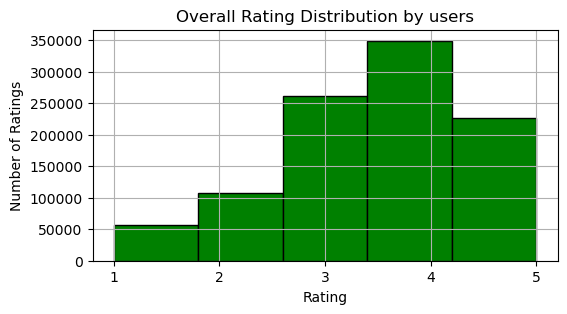

In [40]:
# create a histogram by visualize the overall rating distribution
plt.figure(figsize=(6, 3))
plt.hist(df_combined['Ratings'],bins=5, color='green', edgecolor='black')
plt.title('Overall Rating Distribution by users')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

## Lets perform Machine Learning on first 500 extracted record

In [42]:
# Extract the first 500 rows of data
df_500 = df_combined.head(500)

# Remove rows with missing values
df_500.dropna(inplace=True)

C:\Users\pearl\AppData\Local\Temp\ipykernel_18556\2987332824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500.dropna(inplace=True)


## Use the following features: movie,id,age,occupation

In [44]:
# Select specific columns for analysis
features = df_500[['MovieID','Age','Occupation']].values

In [45]:
# Rating as labels
labels = df_500[['Ratings']].values

In [48]:
#Create train and test data set
train, test, train_label, test_label = train_test_split(features,labels,test_size=0.33,random_state=42)

In [49]:
# Display the Shapes of train and test sets
print("X_train shape:", train.shape)
print("y_train shape:", train_label.shape)
print("X_test shape:", test.shape)
print("y_test shape:", test.shape)

X_train shape: (335, 3)
y_train shape: (335, 1)
X_test shape: (165, 3)
y_test shape: (165, 3)


Text(0.5, 0, 'Ratings')

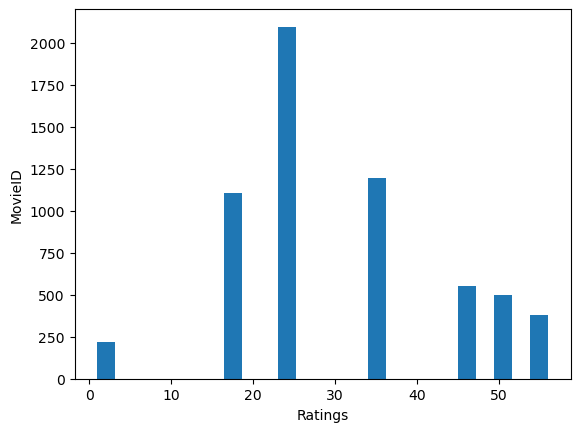

In [50]:
# create a histogram for movie
df_combined.Age.plot.hist(bins=25)
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

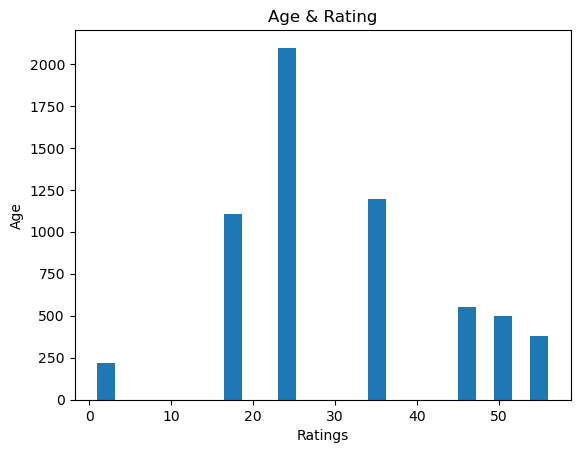

In [51]:
# create a histogram for age
df_combined.Age.plot.hist(bins=25)
plt.title('Age & Rating')
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

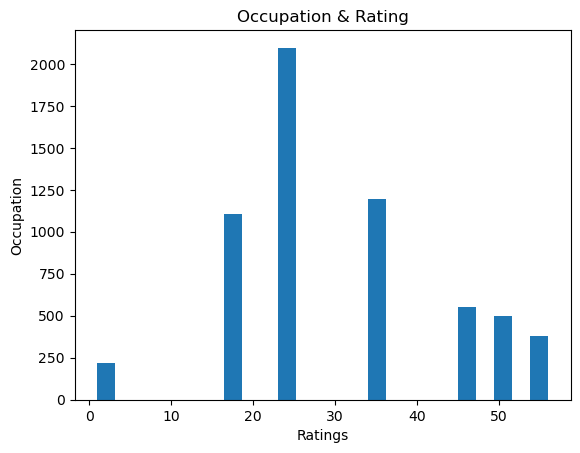

In [52]:
# Create a histogram of occupation
df_combined.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [53]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_label)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_label) * 100, 2)
acc_log

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34.93

In [54]:
# support vector Machines

svc = SVC()
svc.fit(train, train_label)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_label) * 100, 2)
acc_svc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.22

In [55]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_label)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_label) * 100, 2)
acc_knn

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


55.22

In [56]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_label)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_label) * 100, 2)
acc_gaussian

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.22

In [57]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_label)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_label) * 100, 2)
acc_perceptron

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27.76

In [58]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_label)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_label) * 100, 2)
acc_linear_svc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


35.82

In [59]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_label)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_label) * 100, 2)
acc_sgd

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23.28

In [60]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_label)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_label) * 100, 2)
acc_decision_tree


99.1

In [61]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_label)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_label)
acc_random_forest = round(random_forest.score(train, train_label) * 100, 2)
acc_random_forest

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


99.1

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.10
8,Decision Tree,99.10
1,KNN,55.22
7,Linear SVC,35.82
0,Support Vector Machines,35.22
4,Naive Bayes,35.22
2,Logistic Regression,34.93
5,Perceptron,27.76
6,Stochastic Gradient Decent,23.28
